## RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique. You can use it to identify high-value customers in a banking context based on:

**Recency: How recently a customer used banking services.**

**Frequency: How often they used services or made transactions.**

**Monetary: How much money they deposited, invested, or spent.**

In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
#READ THE FILE
bank = pd.read_csv("../output/cleaned_bank_data.csv")

# **EXPLORATORY DATA ANALYSIS (EDA)**

EDA is the foundation of effective data-driven decision-making, helping to uncover patterns, outliers, and relationships within your dataset. Whether it's customer behavior analysis, retention trends, or feature engineering, structured EDA ensures your models are based on well-understood data.

In [3]:
print(bank["CustomerID"].nunique())

799010


In [4]:
bank.shape

(930362, 10)

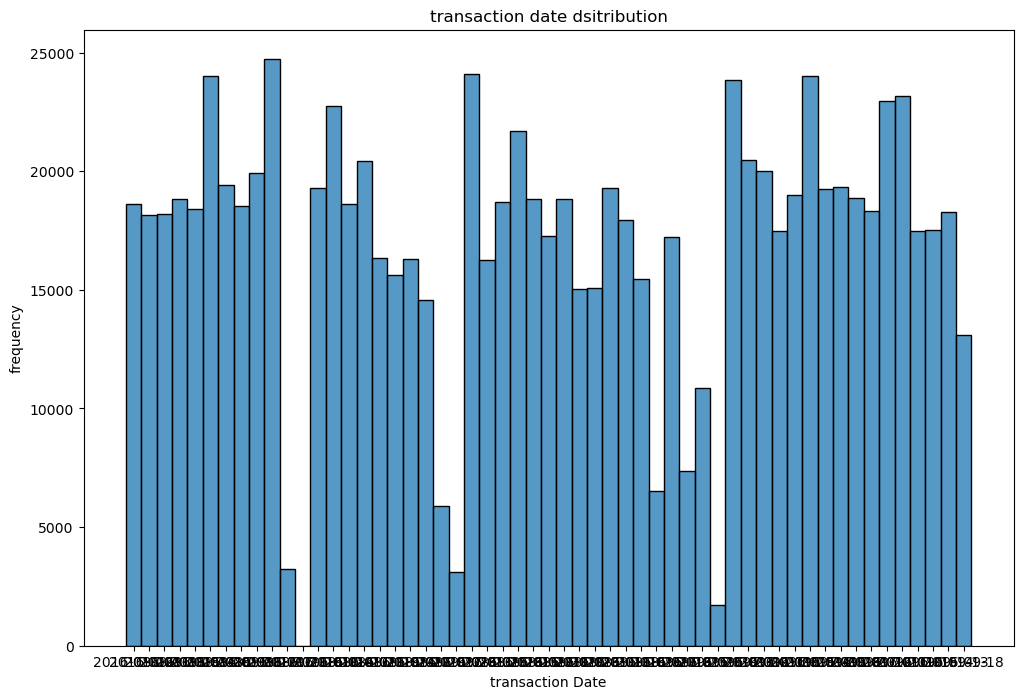

In [5]:
#plot a distribution for data across the unique transaction date
plt.figure(figsize = (12,8))
sns.histplot(bank["TransactionDate"], bins = 3, kde = False)
plt.xlabel("transaction Date")
plt.ylabel("frequency")
plt.title("transaction date dsitribution")
plt.show()

# EDA FOR AGE

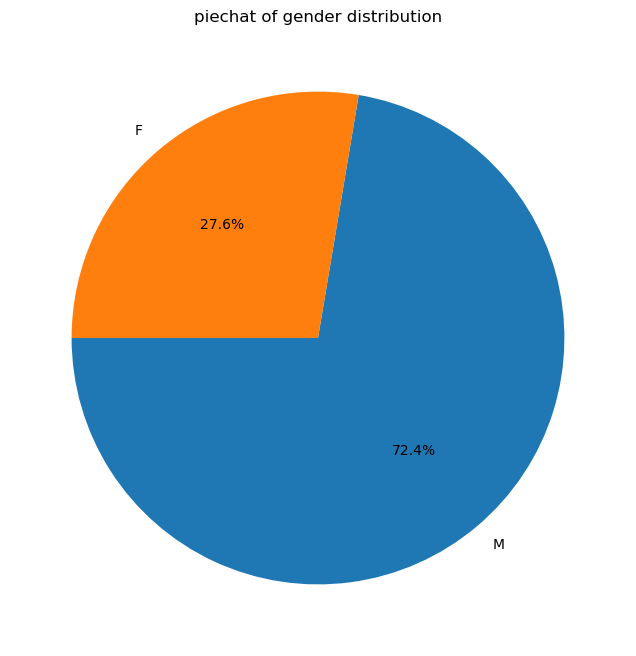

In [6]:
#create the Age percentage of customer

plt.figure(figsize= (8,8))
gender_percent= bank["CustGender"].value_counts()
plt.pie(gender_percent, labels= gender_percent.index, autopct='%1.1f%%', startangle = 180)
plt.title("piechat of gender distribution")
plt.show()

* The pie chart reveals a notable gender distribution, with 73.1% identified as "M" and 26.9% as "F." This disparity suggests that male participants significantly outnumber female participants in the dataset. Such insights can be valuable for understanding demographic trends, customer segmentation, and potential influences on behavior or engagement patterns.


## EDA OF AGE

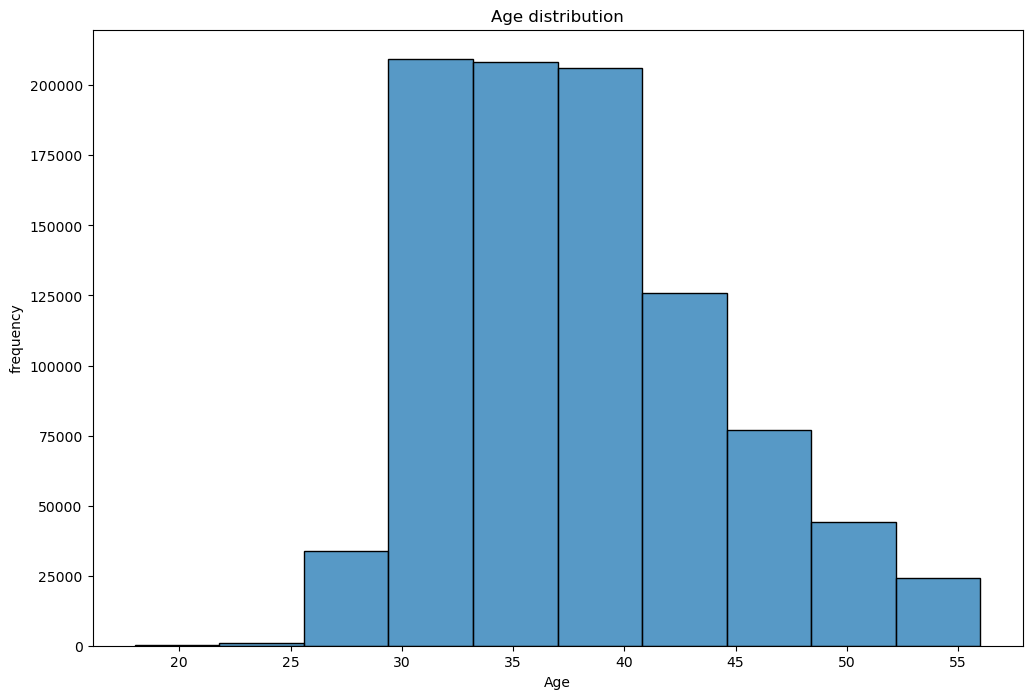

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(bank["Age"], bins = 10, kde=False)
plt.xlabel("Age")
plt.ylabel("frequency")
plt.title("Age distribution")
plt.show()


In [8]:
bank['AgeGroup'] = pd.cut(bank['Age'], bins=[18, 30, 50, 80], labels=['Young', 'Middle', 'Senior'])
bank['AgeGroup'].value_counts()

AgeGroup
Middle    821290
Young      65338
Senior     43690
Name: count, dtype: int64

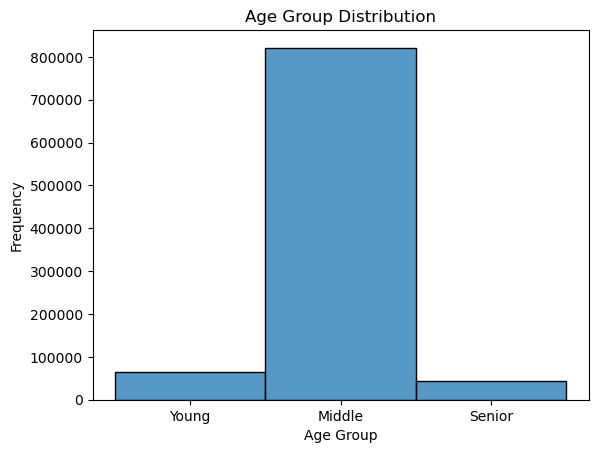

In [9]:

# Plot histogram of AgeGroup distribution
sns.histplot(bank['AgeGroup'], discrete=True)
plt.title("Age Group Distribution")
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show()

* The age group distribution reveals a strong concentration of younger individuals, with the Young category having the highest representation, followed by Middle, while Senior remains the smallest segment. This trend suggests that a majority of customers fall within younger demographics, which may influence consumer behavior, spending patterns, and retention strategies. Understanding how age impacts transaction activity could provide valuable insights for segmentation and targeted decision-making.


 ## EDA OF TRANSACTION TREND

In [10]:
daily_transactions = bank.groupby('TransactionDate')['TransactionAmount (INR)'].sum().reset_index()

In [11]:
daily_transactions.columns = ["TransactionDate", "TransactionAmount (INR)"]

In [12]:
daily_transactions.head()

,TransactionDate,TransactionAmount (INR)
0,2016-08-01,23124090.42
1,2016-08-02,23750808.97
2,2016-08-03,23554073.88
3,2016-08-04,27660030.99
4,2016-08-05,27632861.62


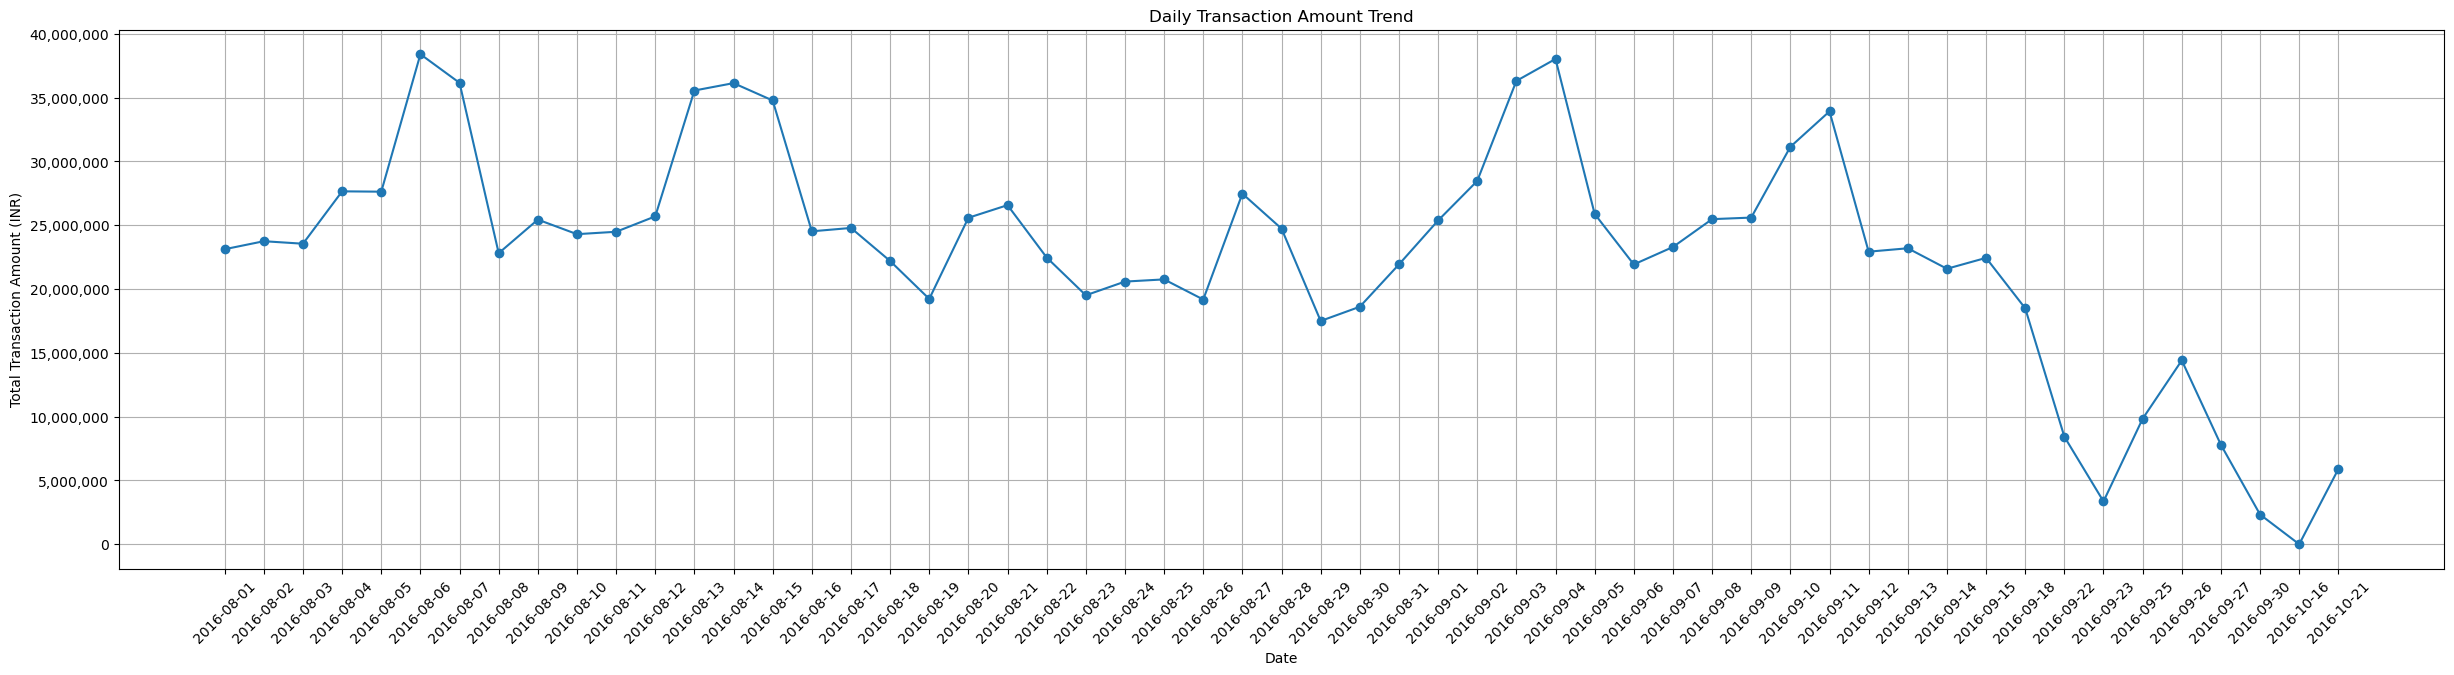

In [13]:
import matplotlib.ticker as ticker
plt.figure(figsize=(30, 7))
plt.plot(daily_transactions["TransactionDate"], daily_transactions["TransactionAmount (INR)"], marker='o', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Total Transaction Amount (INR)')
plt.title('Daily Transaction Amount Trend')
plt.xticks(daily_transactions["TransactionDate"][::1], rotation=45)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()


This **Daily Transaction Amount Trend** graph provides a detailed view of transaction fluctuations over time, allowing for meaningful insights into spending behavior.

### **Key Observations:**
1. **Significant Peaks & Spending Surges**  
   - Major spikes occur around **August 5, August 15, and September 2**, where transaction amounts exceed **40,000,000 INR**.  
   - These peaks may correspond to **pay cycles, promotional events, or seasonal shopping trends**. Examining external factors can clarify whether these trends were expected.

2. **Steady Decline & Sudden Drop**  
   - After **September 23**, transaction amounts sharply decrease, reaching a low around **September 27**.  
   - This could indicate **reduced consumer activity, market shifts, or policy-related impacts** affecting transaction volume.

3. **Final Stabilization Toward the End**  
   - The slight increase on **September 21** suggests potential recovery or an isolated event driving transactions up again.  
   - Further analysis could reveal whether this trend is sustainable or merely a short-lived anomaly.


## EDA OF CUSTOMER LOCATION BASED ON THEIR FREQUENCY

In [14]:
location_counts = bank['CustLocation'].value_counts()

# Show the top 10 most common locations
location_counts.head(10)

CustLocation
MUMBAI       92316
BANGALORE    74428
NEW DELHI    70092
GURGAON      66804
DELHI        63493
NOIDA        30353
CHENNAI      25207
PUNE         23149
HYDERABAD    20732
THANE        19991
Name: count, dtype: int64

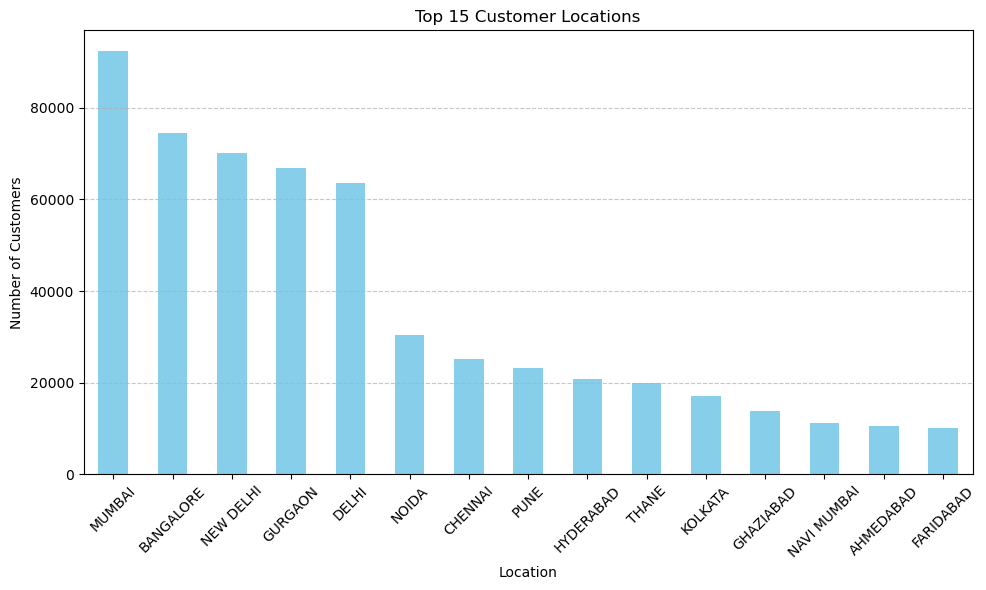

In [15]:
# Plot the top 10 locations
top_locations = location_counts.head(15)

plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='skyblue')
plt.title("Top 15 Customer Locations")
plt.xlabel("Location")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [16]:
# Plot the top 10 locations
least_locations = location_counts.tail(15)
least_locations

CustLocation
RAJAHMUNDRY URBAN                 1
RAHON                             1
CORPORATION THANE                 1
BERAMPUR                          1
HOSHIAR PUR                       1
KANDESHWAR STATION NAVI MUMBAI    1
DHAKOLA                           1
DISTRICT PURI                     1
RAIGAD RAIGAD                     1
PARK BHAYANDAR EAST THANE         1
PIDUGURALLA                       1
KAMALPUR                          1
JUFFAIR                           1
CHAKALA ANDHERI -E MUMBAI         1
IMPERIA THANE WEST                1
Name: count, dtype: int64

### **1. Dominance of Metropolitan Areas**
- **Mumbai, New Delhi, and Bangalore** lead in customer numbers, suggesting a **higher market concentration** in urban regions.
- These cities are **major financial hubs**, explaining their dominance.

### **2. Customer Spread Across Emerging Business Cities**
- **Gurgaon, Noida, Pune, and Hyderabad** show significant presence, reinforcing their role as growing economic centers.
- **Chennai and Kolkata** remain steady contributors to transaction activity.

### **3. Lower Customer Presence AT THE BOTTOM**
- The relatively lower counts indicate potential areas for **targeted business expansion**.
- Local economic factors, banking infrastructure, or marketing strategies could contribute to these figures.


## EDA OF CUSTOMER LOCATION BASED ON THEIR TRANSACTION AMOUNT

In [17]:
location_data = bank.groupby("CustLocation")["TransactionAmount (INR)"].sum().sort_values(ascending=False).reset_index()
location_data

,CustLocation,TransactionAmount (INR)
0,MUMBAI,1.422322e+08
1,NEW DELHI,1.097353e+08
2,BANGALORE,9.530521e+07
3,GURGAON,9.012271e+07
4,DELHI,8.255610e+07
...,...,...
7812,RAJASAMAND,1.000000e+00
7813,PUNE PISOLI,1.000000e+00
7814,KHARAGPUR RLY STN KHARAGPUR,1.000000e+00
7815,JIAGANJ,1.000000e+00


In [18]:
top10 = location_data.head(10)
top10

,CustLocation,TransactionAmount (INR)
0,MUMBAI,1.422322e+08
1,NEW DELHI,1.097353e+08
2,BANGALORE,9.530521e+07
3,GURGAON,9.012271e+07
4,DELHI,8.255610e+07
5,NOIDA,3.794411e+07
6,KOLKATA,3.611547e+07
7,CHENNAI,3.165279e+07
8,PUNE,3.059397e+07
9,HYDERABAD,2.740932e+07


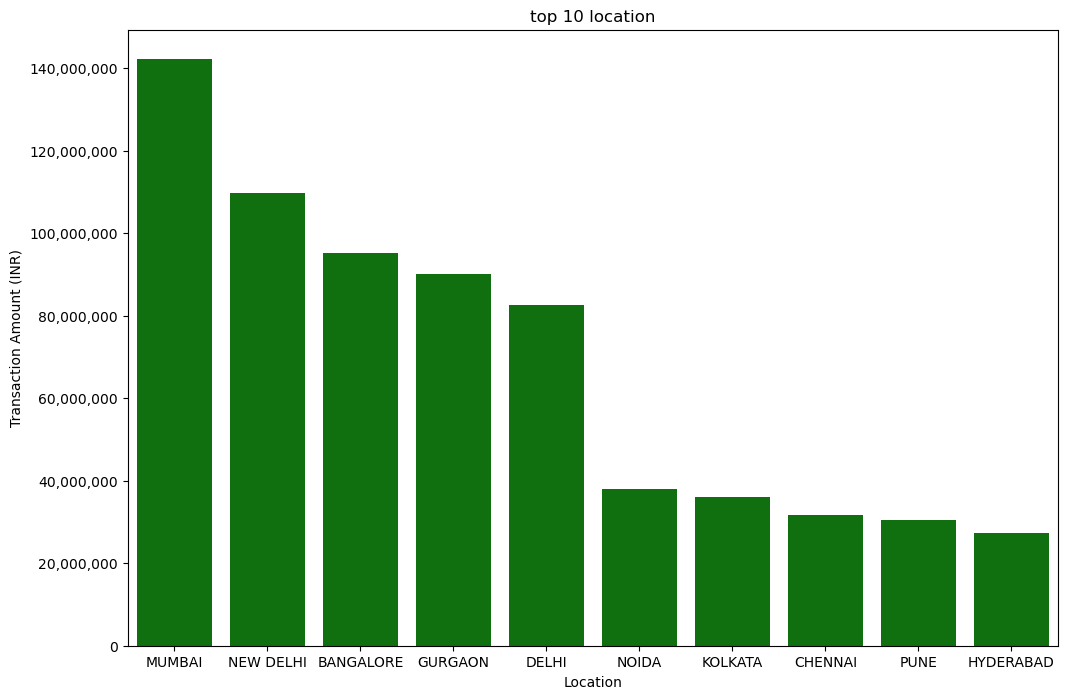

In [19]:

import matplotlib.ticker as ticker

plt.figure(figsize=(12,8))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot( x = 'CustLocation', y = 'TransactionAmount (INR)', data=top10, color='green')
plt.title('top 10 location')
plt.xlabel('Location')
plt.ylabel('Transaction Amount (INR)')
plt.show()

In [20]:
last10 = location_data.tail(10)
last10

,CustLocation,TransactionAmount (INR)
7807,CHAPRELI,1.00
7808,ULHASNAGAR 3,1.00
7809,I BARDDHAMAN,1.00
7810,YEOLA DIST NASIK,1.00
7811,ZAHIRABAD,1.00
7812,RAJASAMAND,1.00
7813,PUNE PISOLI,1.00
7814,KHARAGPUR RLY STN KHARAGPUR,1.00
7815,JIAGANJ,1.00
7816,NEGARA,0.74


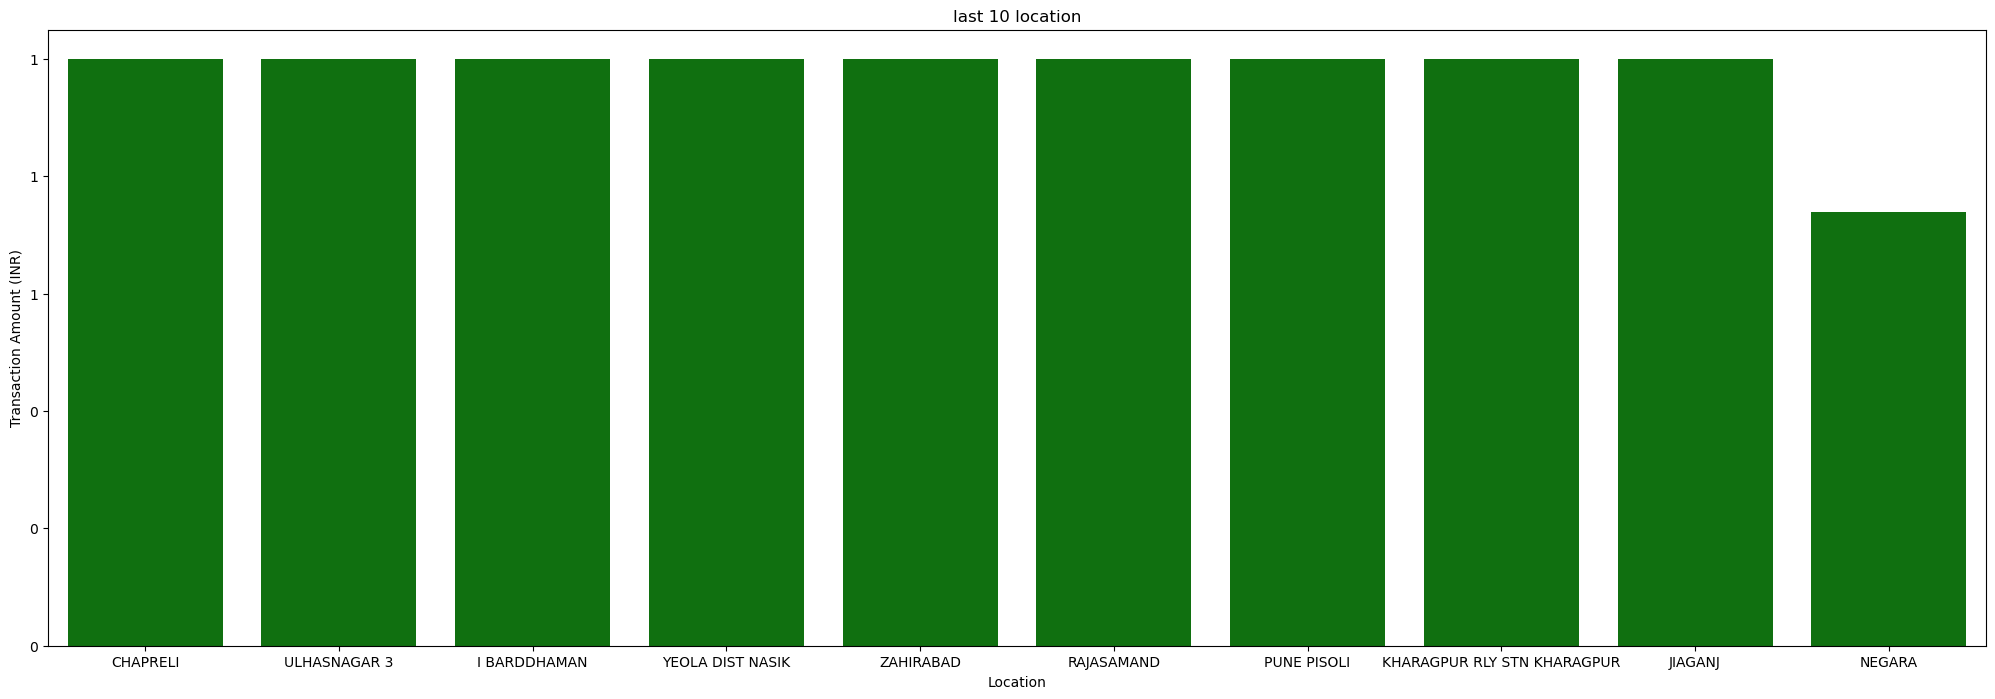

In [21]:
import matplotlib.ticker as ticker

plt.figure(figsize=(25,8))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
sns.barplot( x = 'CustLocation', y = 'TransactionAmount (INR)', data=last10, color='green')
plt.title('last 10 location')
plt.xlabel('Location')
plt.ylabel('Transaction Amount (INR)')
plt.show()


### **Data Insights from High-Value vs. Low-Value Locations**

1. **Skewed Distribution of Transaction Activity**  
   - **High-Performing Urban Centers:**  
     The top-performing graph clearly shows that metropolitan areas such as Mumbai, New Delhi, and Bangalore dominate the landscape with transaction amounts in the hundreds of millions (and even billions) of INR. This indicates that these regions are major hubs of economic activity, likely driven by high population density, strong commercial presence, and well-established financial ecosystems.

   - **Low-Performing Regions:**  
     In stark contrast, the graph depicting the last 10 locations reveals that many areas report extremely low values—often close to 1 INR. This extreme difference suggests one of several possibilities:  
       - Data in these regions could be anomalous or reflect negligible customer engagement.  
       - They might represent remote or less economically active areas where financial transactions are minimal.  
       - Alternatively, these low values might be placeholders arising from data collection or integration issues.

2. **Actionable Business Insights**  
   - **Focus on High-Value Markets:**  
     The high concentration of transactions in select urban regions highlights where strategic focus and resources could be most beneficial. Banks and financial institutions might consider tailored services, increased branch presence, or targeted marketing efforts in these areas.
     
   - **Targeted Interventions for Low-Activity Areas:**  
     Conversely, for regions with minimal financial activity, it may be valuable to investigate whether these areas represent untapped potential or if they are inherently low due to market constraints. A targeted analysis might reveal if improving digital banking penetration or local market initiatives could boost activity.


In [22]:
bank["TransactionAmount (INR)"].describe()

count    9.303620e+05
mean     1.355789e+03
std      5.822674e+03
min      1.000000e-02
25%      1.500000e+02
50%      4.048500e+02
75%      1.058000e+03
max      1.560035e+06
Name: TransactionAmount (INR), dtype: float64

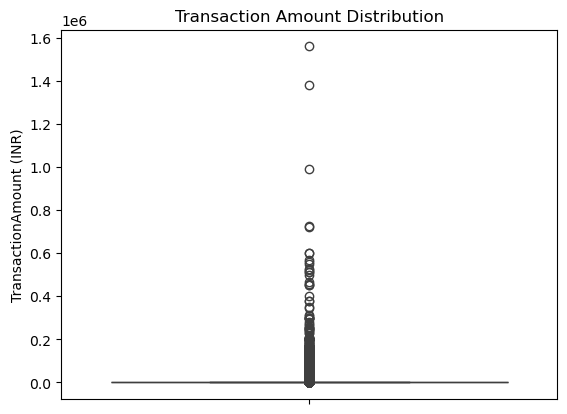

In [23]:
sns.boxplot(bank['TransactionAmount (INR)'])
plt.title("Transaction Amount Distribution")
plt.show()

In [24]:
bank.to_csv("../output/EDA_bank_data.csv", index=False)